# Agrupamento Hierárquico
#### Aplicando o algoritmo de agrupamento hierárquico em uma base de dados de cartão de crédito.

In [1]:
# importando a biblioteca matplotlib do python
import matplotlib.pyplot as plt
%matplotlib inline

# importando a biblioteca scipy do python
from scipy.cluster.hierarchy import dendrogram, linkage

# importando a biblioteca pandas do python
import pandas as pd

# importando a biblioteca sklearn do python
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# importando a biblioteca numpy do python
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# colocando os dados no objeto 'dataframe'
dataframe = pd.read_csv('/content/drive/My Drive/credit_card_clients.csv', encoding = 'utf-8', sep = ',', header = 1)

In [4]:
# visualizando o objeto 'dataframe'
dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [5]:
# visualizando a dimensão do 'dataframe'
print(dataframe.shape)

(30000, 25)


In [6]:
# somando todas as dívidas em uma só coluna para melhor análise dos dados
dataframe['BILL_TOTAL'] = dataframe['BILL_AMT1'] + dataframe['BILL_AMT2'] + dataframe['BILL_AMT3']  
dataframe['BILL_TOTAL'] = dataframe['BILL_AMT4'] + dataframe['BILL_AMT5'] + dataframe['BILL_AMT6']

In [7]:
# visualizando o objeto 'dataframe'
dataframe

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,9988
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,44828
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,86820
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,59217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0,135221
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0,14169
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1,60817
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1,113573


In [8]:
# pegando os dados referentes ao limite do cartão e a dívida total
x = dataframe.iloc[:, [1, 25]].values

In [9]:
# visualizando 'x'
print(x)

[[ 20000      0]
 [120000   9988]
 [ 90000  44828]
 ...
 [ 30000  60817]
 [ 80000 113573]
 [ 50000  84276]]


In [10]:
# visualizando a dimensão de x
print(x.shape)

(30000, 2)


In [11]:
# criando o objeto 'scaler'
scaler = StandardScaler()

In [12]:
# escalonando os atributos armazenados em 'x'
x = scaler.fit_transform(x)

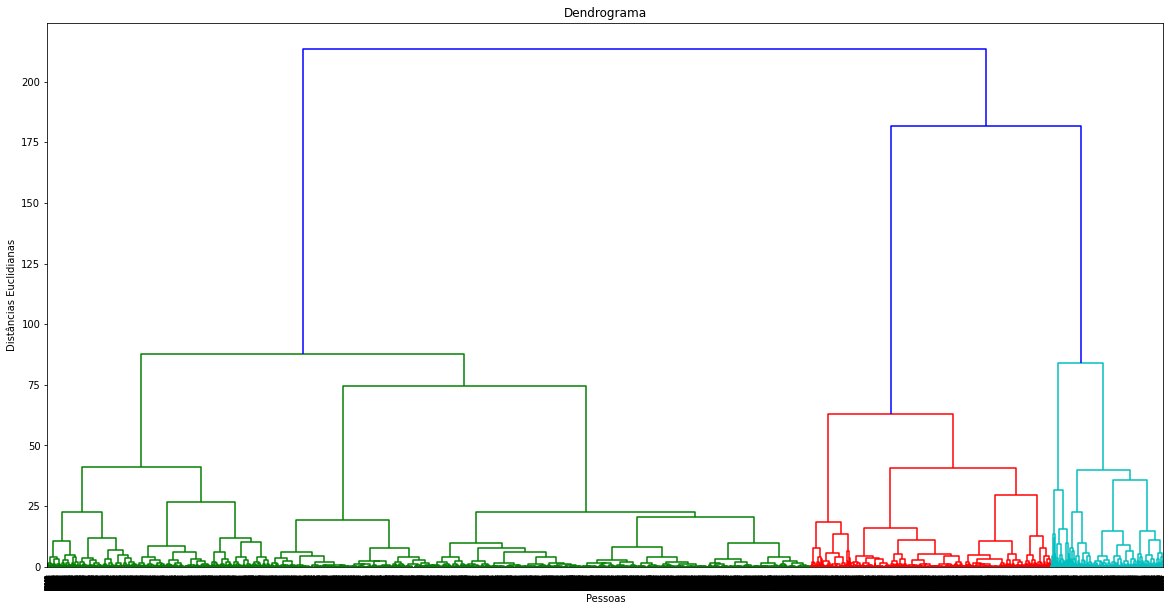

In [13]:
# configurando alguns detalhes do gráfico
plt.figure(figsize = (20, 10))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distâncias Euclidianas')

#configurando o objeto 'dendrograma' para gerar o gráfico 
dendrograma = dendrogram(linkage(x, method = 'ward'))
# 'linkage' responsável por unir os dados
# 'method' é a escolha do tipo de função para cálculo das distâncias, 'ward' é a que possui melhores 
# resultados

In [14]:
# criando o objeto clusterizador 'hc'
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [16]:
# treinando e realizando a clusterização com os dados do dataframe
previsoes = hc.fit_predict(dataframe)

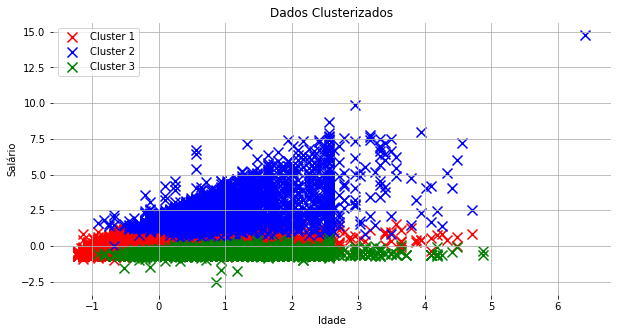

In [17]:
# configurando o gráfico
plt.figure(figsize = (10,5))
plt.title('Dados Clusterizados')
plt.scatter(x[previsoes == 0, 0], x[previsoes == 0, 1], s = 100, marker = 'x', c = 'red', 
            label = 'Cluster 1')
plt.scatter(x[previsoes == 1, 0], x[previsoes == 1, 1], s = 100, marker = 'x', c = 'blue', 
            label = 'Cluster 2')
plt.scatter(x[previsoes == 2, 0], x[previsoes == 2, 1], s = 100, marker = 'x', c = 'green', 
            label = 'Cluster 3')
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.grid(True)
plt.box(False)
plt.legend()

### Alguma Dúvida? Entre em Contato Comigo:

- [Me envie um e-mail](mailto:alyssonmachado388@gmail.com);